In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv", sep =",")

In [ ]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB
None


In [ ]:
# Tratamento de dados nulos
df.dropna(inplace=True)

# Verificando que não há mais dados nulos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    403182 non-null  object 
 1   StockCode    403182 non-null  object 
 2   Description  403182 non-null  object 
 3   Quantity     403182 non-null  float64
 4   InvoiceDate  403182 non-null  object 
 5   UnitPrice    403182 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      403182 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.7+ MB
None


In [ ]:

# Tratamento de outliers usando IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1



<ipython-input-83-64bbfe0c1478>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-83-64bbfe0c1478>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [ ]:
# Removendo linhas com outliers apenas para colunas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns
df_no_outliers = df[~((df[numeric_columns] < (Q1[numeric_columns] - 1.5 * IQR[numeric_columns])) | (df[numeric_columns] > (Q3[numeric_columns] + 1.5 * IQR[numeric_columns]))).any(axis=1)]


In [ ]:
# Verificando as dimensões antes e depois do tratamento
print("Antes do tratamento de outliers:", df.shape)
print("Após o tratamento de outliers:", df_no_outliers.shape)

Antes do tratamento de outliers: (319574, 8)
Após o tratamento de outliers: (319574, 8)


In [ ]:
# Verificando e removendo preços unitários ou quantidades iguais ou inferiores a zero
df = df_no_outliers[(df_no_outliers['UnitPrice'] > 0) & (df_no_outliers['Quantity'] > 0)]


In [ ]:
# Confirmando que não hexistem valores nulos ou <= a zero
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319574 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    319574 non-null  object        
 1   StockCode    319574 non-null  object        
 2   Description  319574 non-null  object        
 3   Quantity     319574 non-null  float64       
 4   InvoiceDate  319574 non-null  datetime64[ns]
 5   UnitPrice    319574 non-null  float64       
 6   CustomerID   319574 non-null  float64       
 7   Country      319574 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 21.9+ MB
None


In [ ]:
# Verificando e removendo observações com valores nulos na identificação do cliente
print("Quantidade de valores nulos em CustomerID:", df['CustomerID'].isna().sum())

Quantidade de valores nulos em CustomerID: 0


In [ ]:
# Remover linhas com valores nulos na identificação do cliente
df = df.dropna(subset=['CustomerID'])

In [ ]:
# Confirmar que não existem mais valores nulos na identificação do cliente
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 319574 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    319574 non-null  object        
 1   StockCode    319574 non-null  object        
 2   Description  319574 non-null  object        
 3   Quantity     319574 non-null  float64       
 4   InvoiceDate  319574 non-null  datetime64[ns]
 5   UnitPrice    319574 non-null  float64       
 6   CustomerID   319574 non-null  float64       
 7   Country      319574 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 21.9+ MB
None


In [ ]:
# Convertendo a coluna InvoiceDate para o formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
from datetime import datetime

# Verificar e remover preços unitários ou quantidades iguais ou inferiores a zero
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

# Confirmar que não há mais valores nulos ou menores/iguais a zero
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 319574 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    319574 non-null  object        
 1   StockCode    319574 non-null  object        
 2   Description  319574 non-null  object        
 3   Quantity     319574 non-null  float64       
 4   InvoiceDate  319574 non-null  datetime64[ns]
 5   UnitPrice    319574 non-null  float64       
 6   CustomerID   319574 non-null  float64       
 7   Country      319574 non-null  object        
 8   Recency      319574 non-null  int64         
 9   TotalAmount  319574 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 26.8+ MB
None


In [ ]:
# Calculando a recência (tempo desde a última compra)
max_date = df['InvoiceDate'].max()
df['Recency'] = (max_date - df['InvoiceDate']).dt.days


In [ ]:
# Calculando a frequência (quantidade de compras)
rfm_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
rfm_frequency.columns = ['CustomerID', 'F']



In [ ]:
# Calculando o valor total gasto por cliente
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
rfm_monetary = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
rfm_monetary.columns = ['CustomerID', 'M']


In [ ]:
# Calculando o ticket médio
rfm_monetary['TicketAverage'] = rfm_monetary['M'] / rfm_frequency['F']


In [ ]:
# Calculando a recência novamente para evitar conflitos no merge
df_r = df.groupby('CustomerID')['Recency'].min().reset_index()


In [ ]:
# Merge das tabelas para obter as métricas RFM
rfm_result = df_r.merge(rfm_frequency, on='CustomerID').merge(rfm_monetary[['CustomerID', 'TicketAverage']], on='CustomerID')


In [ ]:
# Salvar o resultado em um novo arquivo CSV
rfm_result.to_csv("output.csv", index=False)

# Primeiras linhas do resultado final
print(rfm_result.head())

   CustomerID  Recency  F  TicketAverage
0     12347.0        1  7     461.875714
1     12348.0      248  3      30.066667
2     12349.0       18  1     918.100000
3     12350.0      309  1     294.400000
4     12352.0       35  7     140.905714


In [ ]:
# Verificando se existem linhas duplicadas
duplicated_rows = df[df.duplicated()]

# Removendo linhas duplicadas
df = df.drop_duplicates()

# Confirmar que não há mais linhas duplicadas
print("Quantidade de linhas duplicadas antes da remoção:", len(duplicated_rows))
print("Quantidade de linhas duplicadas após a remoção:", len(df[df.duplicated()]))


Quantidade de linhas duplicadas antes da remoção: 4696
Quantidade de linhas duplicadas após a remoção: 0


In [ ]:
# Correção dos tipos de dados
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Quantity'] = df['Quantity'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].astype(float)
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype(str)

# Visualizando os novos tipos de dados
print(df.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Recency                 int64
TotalAmount           float64
dtype: object


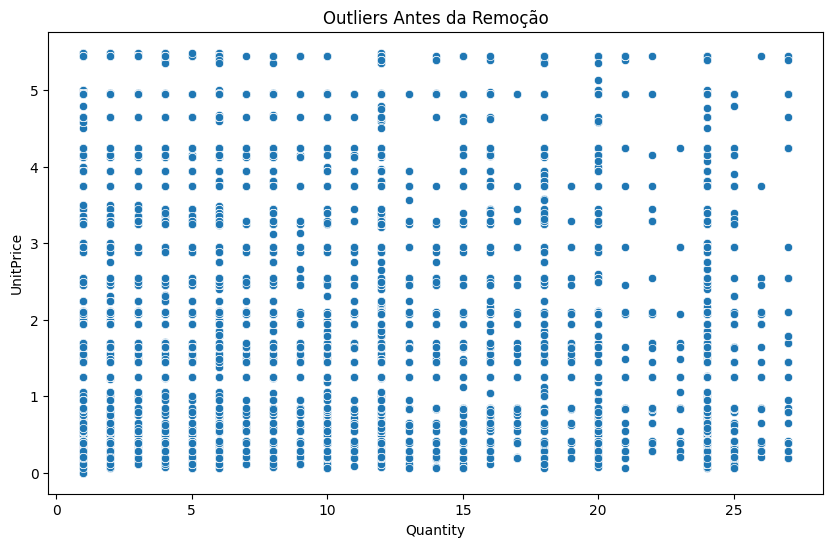

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um gráfico de dispersão para visualizar outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Outliers Antes da Remoção')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()



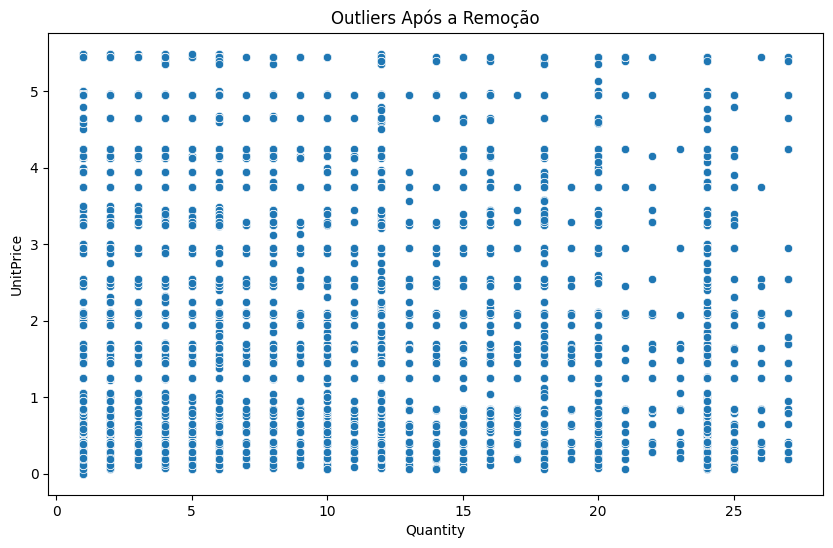

In [ ]:
# Remover outliers
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

# Visualizando gráfico novamente após a remoção
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Outliers Após a Remoção')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [ ]:
# Criação de uma coluna adicional com o preço total da compra
df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Recency  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom      373   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom      373   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom      373   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom      373   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom      373   

   TotalAmount  TotalPurchase  
0        15.30          15.30  
1        20.34          20.34  
2        22.00          22.00  


In [ ]:
# Calculando a data da última compra no conjunto de dados
last_purchase_date = df['InvoiceDate'].max()
print("Data da última compra:", last_purchase_date)


Data da última compra: 2011-12-09 12:50:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando o valor de venda total por país
total_sales_by_country = df.groupby('Country')['TotalPurchase'].sum().sort_values(ascending=False)

# Selecionar os top 10 países
top_countries = total_sales_by_country.head(10)


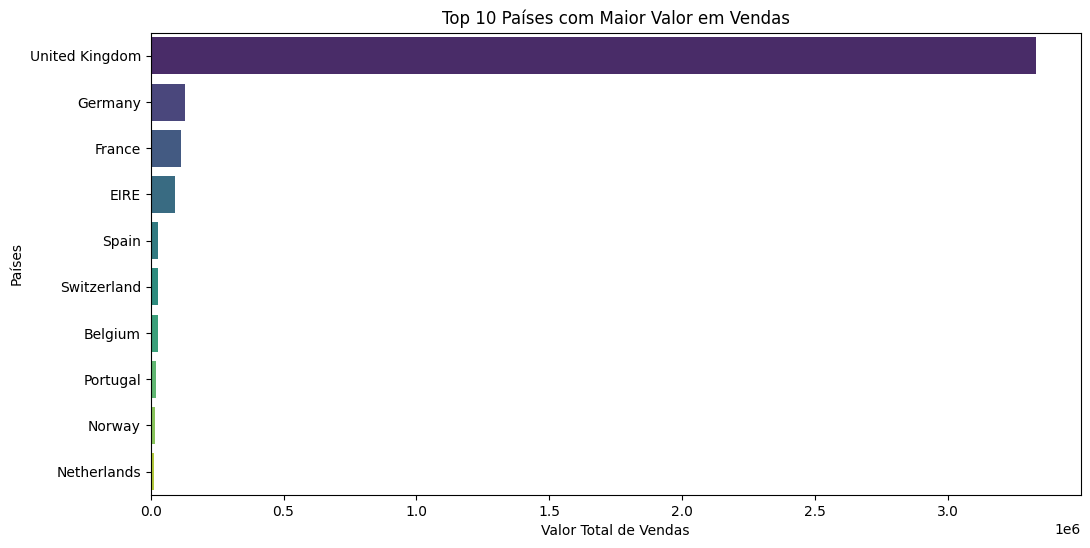

In [ ]:
# Visualização em gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Países')
plt.show()


In [ ]:
# Cálculo da quantidade total vendida por produto
total_quantity_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Selecionar os top 10 produtos
top_products = total_quantity_by_product.head(10)



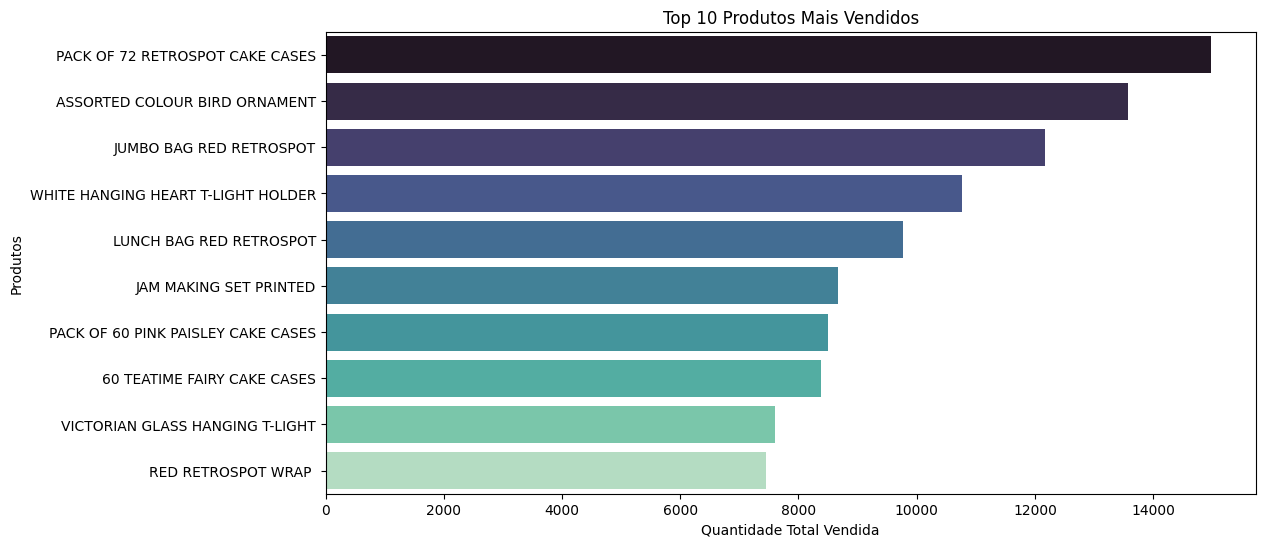

In [ ]:
# Visualização em gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Produtos')
plt.show()

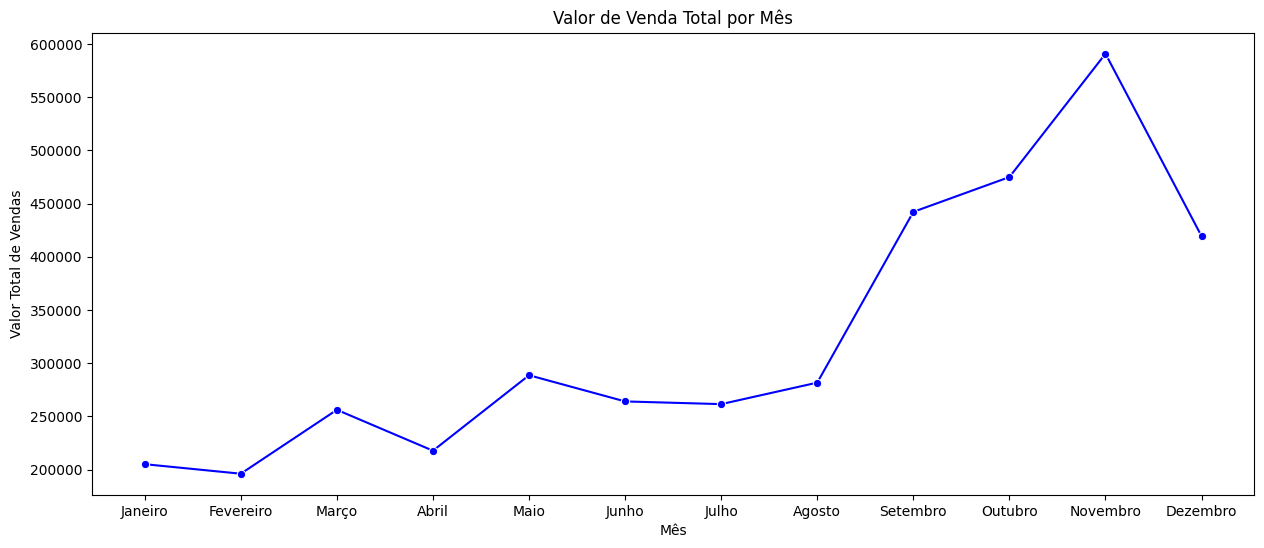

In [ ]:
# Criando uma coluna com o mês da compra
df['Month'] = df['InvoiceDate'].dt.month

# Calculando o valor total de vendas por mês
total_sales_by_month = df.groupby('Month')['TotalPurchase'].sum()

# Mapear os números do mês para seus nomes
month_names = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
               7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Ordenar os meses
total_sales_by_month = total_sales_by_month.sort_index()

# Visualizar gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(x=total_sales_by_month.index.map(month_names), y=total_sales_by_month.values, marker='o', color='blue')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.show()


In [ ]:
# Calculo do valor de venda total por mês e por país (considerando apenas os top 10)
total_sales_by_month_country = df.groupby(['Month', 'Country'])['TotalPurchase'].sum().reset_index()

# Selecionar os top 10 países
top_countries = total_sales_by_country.head(10).index

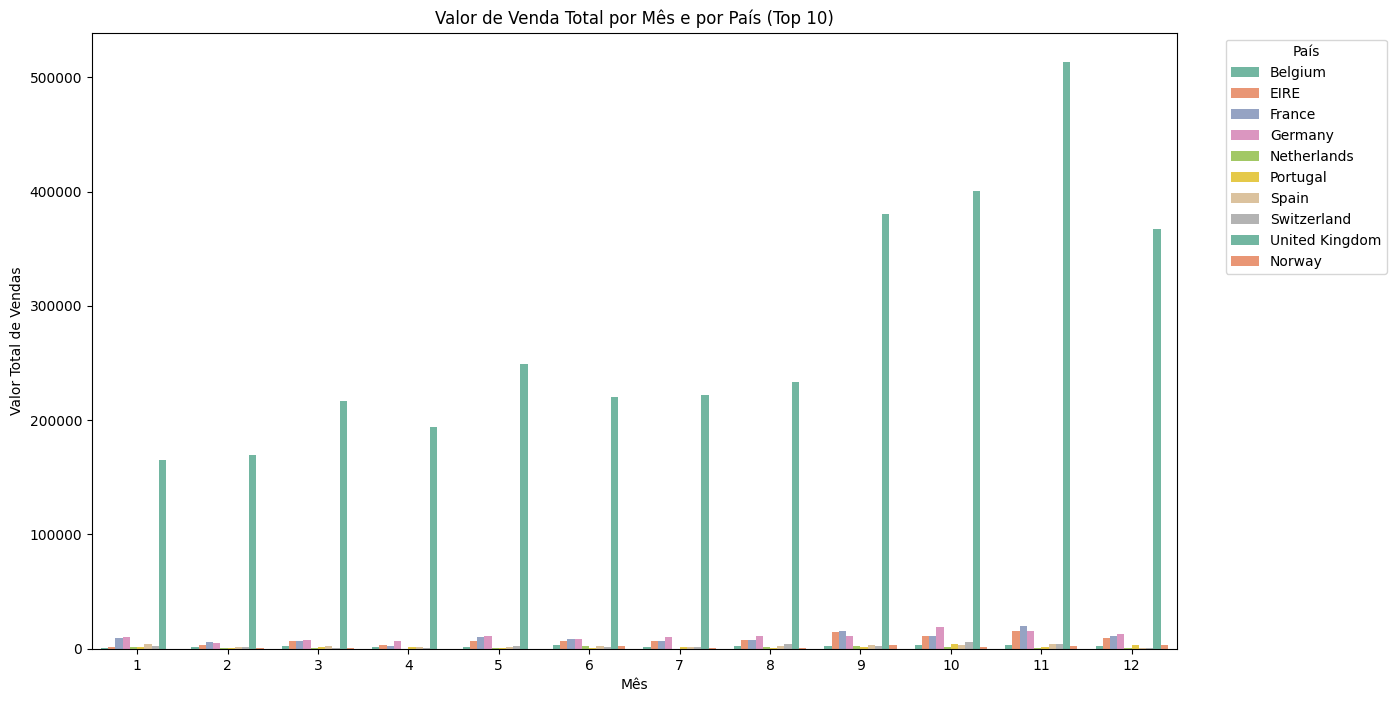

In [ ]:
# Filtrar apenas os top 10 países
total_sales_by_month_country_top10 = total_sales_by_month_country[total_sales_by_month_country['Country'].isin(top_countries)]

# Gráfico de barras agrupado por país
plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='TotalPurchase', hue='Country', data=total_sales_by_month_country_top10, palette='Set2')
plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
# Calcular RFM
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_purchase_date - x.max()).days,  # Recência
    'InvoiceNo': 'nunique',  # Frequência
    'TotalPurchase': 'mean'  # Média de compras
}).reset_index()

# Renomear colunas para RFM
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [ ]:
# Calcular média das compras por cliente
rfm_avg_purchase = df.groupby('CustomerID')['TotalPurchase'].mean().reset_index()
rfm_avg_purchase.columns = ['CustomerID', 'AvgPurchase']

# Merge dos resultados para obter o RFM completo
rfm_data = rfm_data.merge(rfm_avg_purchase, on='CustomerID')

# Renomear colunas para RFM
rfm_data.columns = ['CustomerID', 'InvoiceNo', 'Recency', 'Frequency', 'Monetary']

# Visualizar as primeiras linhas do resultado
print(rfm_data.head())

   CustomerID  InvoiceNo  Recency  Frequency   Monetary
0       12347          1        7  19.835153  19.835153
1       12348        248        3  15.033333  15.033333
2       12349         18        1  17.322642  17.322642
3       12350        309        1  18.400000  18.400000
4       12352         35        7  16.717627  16.717627
